In [66]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import scipy.stats as stats
import pandas as pd
sns.set()

# Zad 3

In [67]:
h=np.arange(-50,51,1)
n=1000

In [68]:
def autocovariation(x,h):
    h=abs(h)
    n=len(x)
    return (1/n)*sum((x[:n-h]-np.mean(x))*(x[h:]-np.mean(x)))

In [69]:
def autocovariation_theo(h,sigma):
    true_autocovariance_values = []
    for hs in h:
        if hs==0:
            true_autocovariance_values.append(sigma**2)
        else:
            true_autocovariance_values.append(0)
    return true_autocovariance_values

In [70]:
x_t=np.random.normal(0,2,1000)

In [71]:
autocovariation_list=[]
for hs in h:
    autocovariation_list.append(autocovariation(x_t,hs))

true_autocovariance_values = autocovariation_theo(h,2)

Text(0, 0.5, 'Autokowariancja')

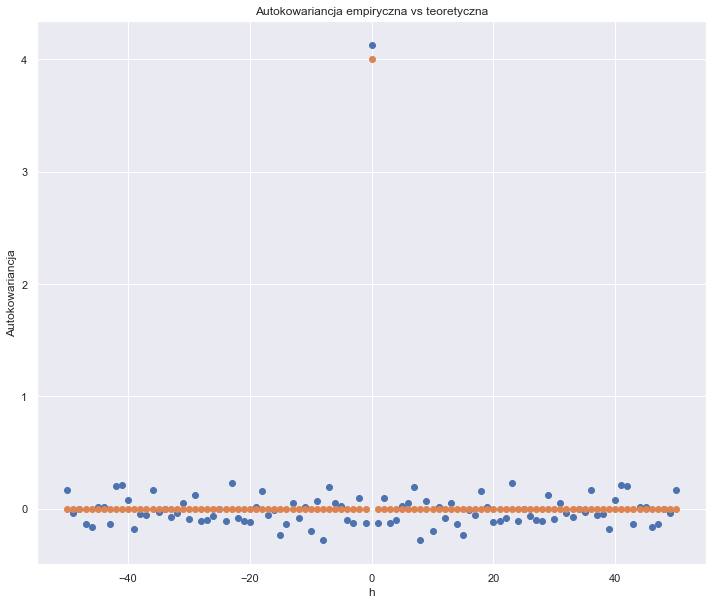

In [72]:
plt.figure(figsize=(12,10))
plt.scatter(h,autocovariation_list)
plt.scatter(h,true_autocovariance_values)
plt.title("Autokowariancja empiryczna vs teoretyczna")
plt.xlabel("h")
plt.ylabel("Autokowariancja")

# Korelacja

In [73]:
def autokorelacja_empirical(x,h):
    return autocovariation(x,h)/autocovariation(x,0)

In [74]:
autokorelacja_empirical_1=[]
for hs in h:
    autokorelacja_empirical_1.append(autokorelacja_empirical(x_t,hs))

In [75]:
def autokorelajca_theo(h1):
    true_autocorr_values = []
    for hs in h1:
        if hs==0:
            true_autocorr_values.append(1)
        else:
            true_autocorr_values.append(0)
    return true_autocorr_values

In [76]:
corr_1=autokorelajca_theo(h)

Text(0, 0.5, 'Autokorelacja')

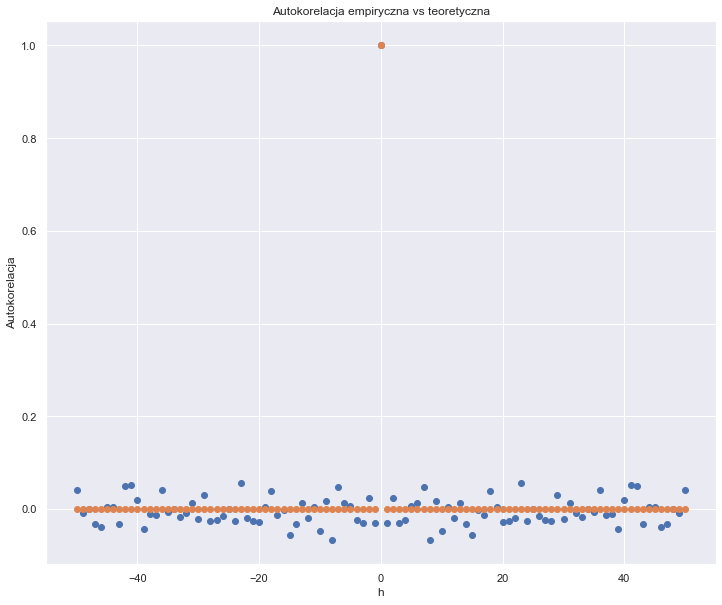

In [77]:
plt.figure(figsize=(12,10))
plt.scatter(h,autokorelacja_empirical_1)
plt.scatter(h,corr_1)
plt.title("Autokorelacja empiryczna vs teoretyczna")
plt.xlabel("h")
plt.ylabel("Autokorelacja")

# Zad 4

In [78]:
h=np.arange(-50,51,1)

In [79]:
def cov_the_2(h,sigma,theta):
    true_autocovariance_values = []
    for hs in h:
        if hs==0:
            true_autocovariance_values.append((sigma**2)*(1+theta**2))
        elif hs==1 or hs==-1:
            true_autocovariance_values.append(theta*sigma**2)
        else:
            true_autocovariance_values.append(0)
    return true_autocovariance_values

In [80]:
theta=0.5
n=1000
Z_t=np.random.normal(0,2,n)
X_t_new=Z_t[1:]+theta*Z_t[:n-1]

# Kowariancja

In [81]:
cov_theoretical_2=cov_the_2(h,2,theta)

In [82]:
cov_empi_2=[]
for hs in h:
    cov_empi_2.append(autocovariation(X_t_new,hs))

Text(0, 0.5, 'Autokowariancja')

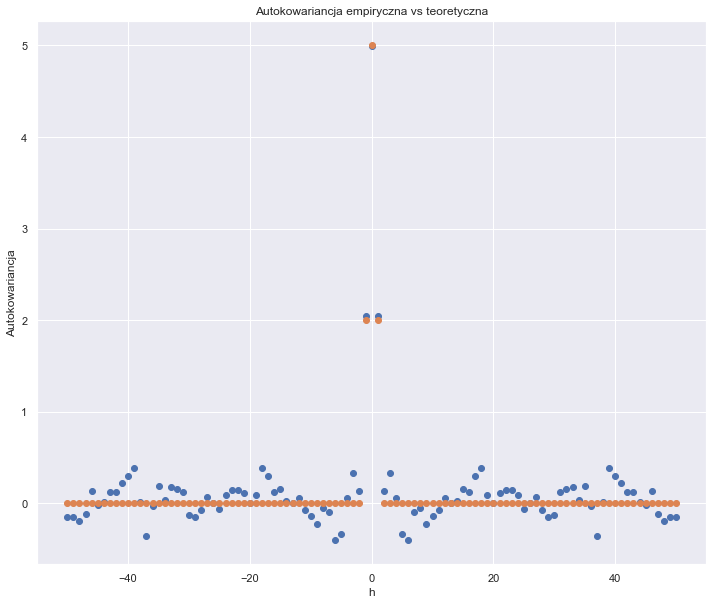

In [83]:
plt.figure(figsize=(12,10))
plt.scatter(h,cov_empi_2)
plt.scatter(h,cov_theoretical_2)
plt.title("Autokowariancja empiryczna vs teoretyczna")
plt.xlabel("h")
plt.ylabel("Autokowariancja")

# Korelacja

In [84]:
def corr_theo_empiricial_2(theta,hs):
    true_autocorr_values=[]
    for h in hs:
        if h==0:
            true_autocorr_values.append(1)
        elif h==1 or h==-1:
            true_autocorr_values.append(theta/(1+theta**2))
        else:
            true_autocorr_values.append(0)
    return true_autocorr_values

In [85]:
corr_theo_2=corr_theo_empiricial_2(theta,h)

In [86]:
autokorelacja_empirical_2=[]
for hs in h:
    autokorelacja_empirical_2.append(autokorelacja_empirical(X_t_new,hs))

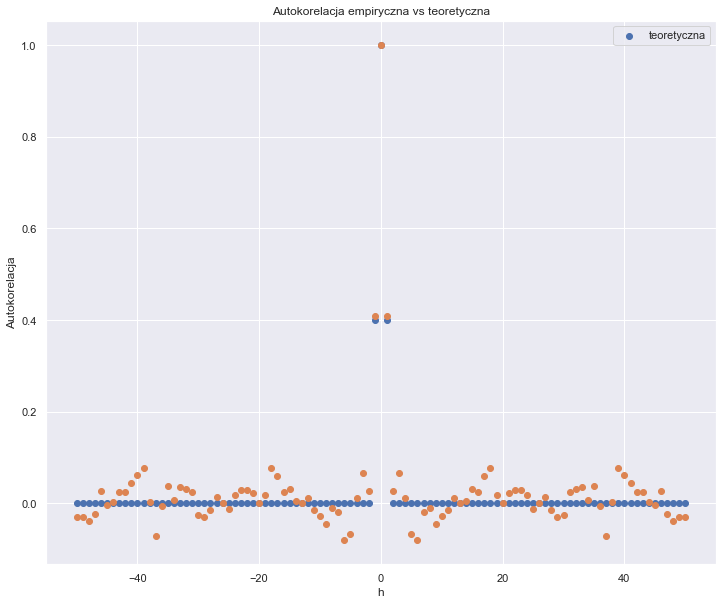

In [87]:
plt.figure(figsize=(12,10))
plt.scatter(h,corr_theo_2, label="teoretyczna")
plt.scatter(h,autokorelacja_empirical_2)
plt.title("Autokorelacja empiryczna vs teoretyczna")
plt.xlabel("h")
plt.ylabel("Autokorelacja")
plt.legend()

# Zad 5